# STIX python tutorial

## STIX in 60 seconds

![STIX](https://www.aotag.ch/wp-content/uploads/STIX-Telescope-exploded-view-2.png)


![STIX_IMG](https://pbs.twimg.com/media/DEn9pZLWsAAZxOb?format=jpg&name=large)

* 4 data processing chains
    * House Keeping (HK) - instantaneous measurements ever 64s
    * Quick Look (QL) - count data accumulated over 4s
        * Each detection increments one of 12288 QL accumulators (32e x 32d x 12p)
    * Science Data (SCI) - count data obtain at variable native cadence
        * Each detection increment one of 12288 SCI accumulators (32e x 32d x 12p)
        * A Each detection also increments one of 16 trigger accumulators
        * Integration continues in units of 0.1s until:
            * minimum integration time has been exceeded AND count threshold (within a specified energy range) has also been exceeded
            * maximum integration time is reached
        * Once integration in complete the FPGA transfer the accumulators to a time tagged rotating buffer
        * The flight software then removes accumulators with zero counts and stores in the “archive buffer”  as a new file (16GB flash)
    * Energy Calibration (CAL) - count data obtained in "quite" times
        * Each detection increments one of 393216 accumulators (1024e x 32d x 12p)

![STIX_DET_PLANE](https://user-images.githubusercontent.com/2226714/124253888-c417c900-db28-11eb-91a1-ad75d59dc662.png)

## stixpy 

###    repo: https://github.com/samaloney/stixpy
###    docs: https://stixpy.readthedocs.io/en/latest/


## Quick Look
### Search & Download

In [1]:
from sunpy.net import Fido, attrs as a
from stixpy.net import client # Registers stixpy with Fido

ql_query = Fido.search(a.Time('2021-12-15', '2021-12-15T23:59:59'), a.Instrument.stix)

        Use sunpy.net.Scraper instead. [stixpy.net.client]


In [2]:
ql_query

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
object,object,str4,str2,str3,str13,str3,str21
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-lightcurve,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-background,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-variance,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-spectra,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-flareflag,V01,-
2021-12-15 01:03:29.000,2021-12-15 01:06:20.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150017
2021-12-15 01:16:27.000,2021-12-15 01:31:36.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150018
2021-12-15 01:35:27.000,2021-12-15 01:58:04.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150037
2021-12-15 02:07:11.000,2021-12-15 02:13:27.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150019


Could filter the results for specific data

In [4]:
ql_mask = ql_query['stix']['DataType'] == 'QL'
ql_query['stix'][ql_mask]

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
object,object,str4,str2,str3,str13,str3,str21
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-lightcurve,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-background,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-variance,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-spectra,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-flareflag,V01,-


But stixpy add a number of STIX specific attrs:
 * `a.stix.DataType` - a type of data e.g. ql, cal, sci, hk
 * `a.stix.DataProduct` - a specific product e.g. ql-background

so the same results can be achieved using the `a.stix.DataType` attr

In [5]:
ql_query = Fido.search(a.Time('2021-12-15', '2021-12-15T23:59:59'), 
                       a.Instrument.stix, a.stix.DataType.ql)
ql_query


        Use sunpy.net.Scraper instead. [stixpy.net.client]


Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
object,object,str4,str2,str2,str13,str3,str1
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-lightcurve,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-background,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-variance,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-spectra,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-flareflag,V01,-


In [6]:
# a.stix.DataType.
# a.stix.DataProduct.
# a.stix.

Now lets download some QL data

In [7]:
ql_files = Fido.fetch(ql_query)
ql_files

['/Users/shane/sunpy/data/solo_L1_stix-ql-variance_20211215_V01.fits', '/Users/shane/sunpy/data/solo_L1_stix-ql-background_20211215_V01.fits', '/Users/shane/sunpy/data/solo_L1_stix-ql-lightcurve_20211215_V01.fits', '/Users/shane/sunpy/data/solo_L1_stix-ql-flareflag_20211215_V01.fits', '/Users/shane/sunpy/data/solo_L1_stix-ql-spectra_20211215_V01.fits']

In [14]:
[q.split('/')[-1] for q in ql_files]

['solo_L1_stix-ql-variance_20211215_V01.fits',
 'solo_L1_stix-ql-background_20211215_V01.fits',
 'solo_L1_stix-ql-lightcurve_20211215_V01.fits',
 'solo_L1_stix-ql-flareflag_20211215_V01.fits',
 'solo_L1_stix-ql-spectra_20211215_V01.fits']

## !!! Note the order of the returned files can change !!!

See this issue on sunpy https://github.com/sunpy/sunpy/issues/5517

Once we have the data we can load and plot

In [15]:
from sunpy.timeseries import TimeSeries
from stixpy import timeseries # Registers stixpy TimeSeries with sunpy TimeSeries

ql_lc = TimeSeries(ql_files[2])

Small textual representation of the data

In [16]:
ql_lc

QLLightCurve
    Start: 2021-12-15 00:00:02
    End:   2021-12-15 23:59:58
    Center:2021-12-15 12:00:00
    Duration:0.9999537037037036 days or
           23.998888888888885 hours or
           1439.9333333333332 minutes or
           86396.0 seconds

### Plotting

We can plot the data using the `plot()` method

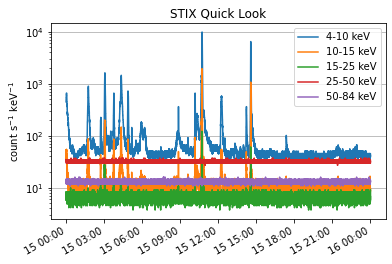

In [17]:
ql_lc.plot();

Just like a normal plot we can interact with it as usual

(18976.375, 18976.5)

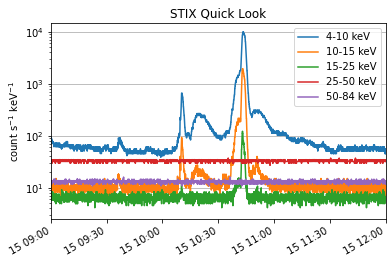

In [18]:
from datetime import datetime
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

ql_lc.plot(axes=ax);
ax.set_xlim([datetime(2021, 12, 15, 9), datetime(2021, 12, 15, 12)])
# ax.set_yscale('linear')

## Science Data
Types or level (lower case l):
* Raw Pixel Data (RPD) or l0 - most raw form uncompressedarchive buffer
* Compressed Pixel Data (CPD) or l1 - compressed and optionally summed over time or energy ✅
* Summed Compressed Pixel Data (SCPD) or l2 - summed over pixels and optionally summed over time or energy
* Visibility or l3 - pixels converted to visibilities on board and optionally summed over time or energy
* Spectrogram or l4 - all pixel and detectors summed into spectrogram and and optionally summed over time or energy ✅
* Burst Aspect - high cadence aspect data

## Spectrograms
### Search & Download
Let use the `a.stix.DataProduct` attr to only search for Spectrogram data

In [19]:
spec_query = Fido.search(a.Time('2021-12-15T09:00', '2021-12-15T12:00:00'), 
                         a.Instrument.stix, a.stix.DataProduct.sci_xray_spec)
spec_query

        Use sunpy.net.Scraper instead. [stixpy.net.client]


Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str13,str3,int64
2021-12-15 07:18:31.000,2021-12-15 10:00:59.000,STIX,L1,SCI,sci-xray-spec,V01,2112150006
2021-12-15 07:18:31.000,2021-12-15 10:00:59.000,STIX,L1,SCI,sci-xray-spec,V01,2112156715
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V01,2112150007
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V01,2112155435
2021-12-15 10:29:12.000,2021-12-15 12:09:42.000,STIX,L1,SCI,sci-xray-spec,V01,2112150008
2021-12-15 10:29:12.000,2021-12-15 12:09:42.000,STIX,L1,SCI,sci-xray-spec,V01,2112153435
2021-12-15 10:31:13.000,2021-12-15 11:00:44.000,STIX,L1,SCI,sci-xray-spec,V01,2112150016
2021-12-15 10:31:13.000,2021-12-15 11:00:44.000,STIX,L1,SCI,sci-xray-spec,V01,2112156884
2021-12-15 11:55:52.000,2021-12-15 12:53:04.000,STIX,L1,SCI,sci-xray-spec,V01,2112150009


Lets narrow the time range even more

In [20]:
spec_query = Fido.search(a.Time('2021-12-15T10:30', '2021-12-15T11:01:00'), 
                         a.Instrument.stix, a.stix.DataProduct.sci_xray_spec)
spec_query

        Use sunpy.net.Scraper instead. [stixpy.net.client]


Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str13,str3,int64
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V01,2112150007
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V01,2112155435
2021-12-15 10:31:13.000,2021-12-15 11:00:44.000,STIX,L1,SCI,sci-xray-spec,V01,2112150016
2021-12-15 10:31:13.000,2021-12-15 11:00:44.000,STIX,L1,SCI,sci-xray-spec,V01,2112156884


In [42]:
idx = [i for i, row in enumerate(spec_query['stix']) 
       if row['Request ID'] in (2112150016, 2112156884)]
idx

[2, 3]

Lets downloads the data as before and print the file names so we can load the files we want

In [43]:
spec_files = Fido.fetch(spec_query['stix'][idx])
[s.split('/')[-1] for s in spec_files]

['solo_L1_stix-sci-xray-spec_20211215T103113-20211215T110044_V01_2112150016-54143.fits',
 'solo_L1_stix-sci-xray-spec_20211215T103113-20211215T110044_V01_2112156884-60145.fits']

In [44]:
from stixpy.science import ScienceData
spec0 = ScienceData.from_fits(spec_files[0])
spec1 = ScienceData.from_fits(spec_files[1])

spec0, spec1

(Spectrogram   <sunpy.time.timerange.TimeRange object at 0x122be0da0>
     Start: 2021-12-15 10:31:13
     End:   2021-12-15 11:00:44
     Center:2021-12-15 10:45:59
     Duration:0.020489583333333283 days or
            0.4917499999999988 hours or
            29.504999999999928 minutes or
            1770.2999999999956 seconds
     DetectorMasks
     [0]: [0,1,2,3,4,5,6,7,_,_,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
 
     PixelMasks
     [0...953]: [['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]
 
     EnergyMasks
     [0]: [_,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,_,_,_,_,_,_,_,_,_,_,_,_,_,_],
 Spectrogram   <sunpy.time.timerange.TimeRange object at 0x122be0da0>
     Start: 2021-12-15 10:31:13
     End:   2021-12-15 11:00:44
     Center:2021-12-15 10:45:59
     Duration:0.020489583333333283 days or
            0.4917499999999988 hours or
            29.504999999999928 minutes or
            1770.2999999999956 seconds
     DetectorMasks
     [0]: [0,1

These object have a number of convenience methods and properties to facilitate data analysis

In [45]:
spec0.header, spec0.dE

(SIMPLE  =                    T / conforms to FITS standard                      
 BITPIX  =                    8 / array data type                                
 NAXIS   =                    0 / number of array dimensions                     
 EXTEND  =                    T                                                  
 FILENAME= 'solo_L1_stix-sci-xray-spec_20211215T103113-20211215T110044_V01_2112&'
 CONTINUE  '150016-54143.fits&'                                                  
 CONTINUE  '' / FITS filename                                                    
 RAW_FILE= 'LTP06_manual_req_BatchRequest.PktTmRaw.SOL.0.2022.024.08.38.51.469.&'
 CONTINUE  'aKVN@2022.024.08.38.52.417.1.xml&'                                   
 CONTINUE  '' / Raw filename(s)                                                  
 PARENT  = 'solo_L0_stix-sci-xray-spec_0692879376-0692881146_V01_2112150016-541&'
 CONTINUE  '43.fits&'                                                            
 CONTINUE  '' / 

### Plotting

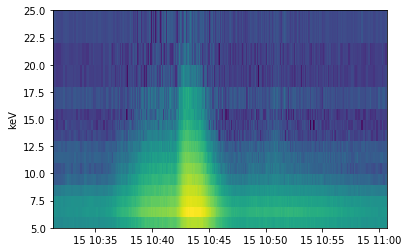

In [46]:
spec0.plot_spectrogram();

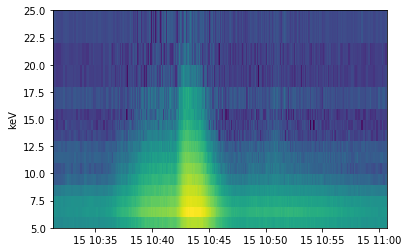

In [47]:
spec1.plot_spectrogram();

<AxesSubplot:ylabel='$\\mathrm{keV}$'>

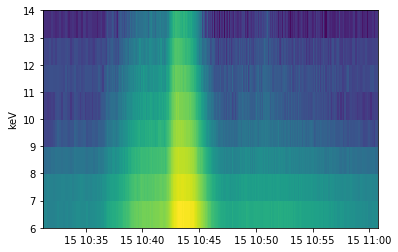

In [48]:
spec1.plot_spectrogram(energy_indices=list(range(1, 11)))

<AxesSubplot:ylabel='$\\mathrm{keV}$'>

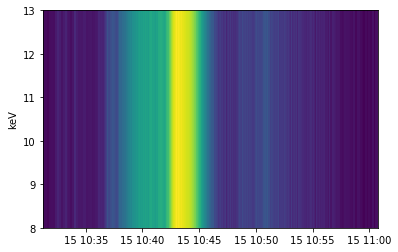

In [49]:
spec1.plot_spectrogram(energy_indices=[[1, 5,],[5, 10],[10,16]])

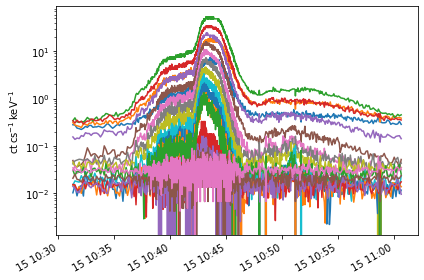

In [50]:
spec0.plot_timeseries();

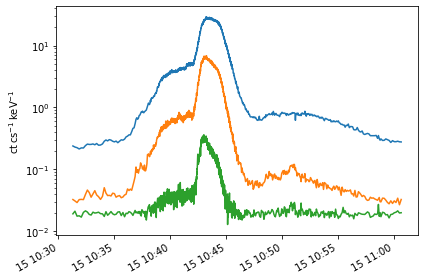

In [51]:
spec0.plot_timeseries(energy_indices=[[1, 5,],[5, 10],[10,16]])

In [52]:
spec0.times.shape

(954,)

Let's sum every 5 time bins to get better signal to noise

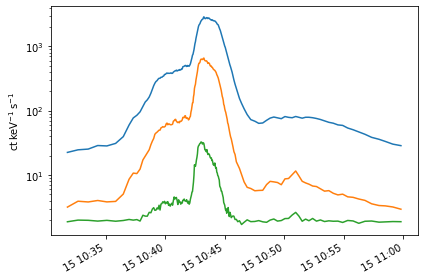

In [53]:
spec0.plot_timeseries(time_indices=[(i*5, (i+1)*5) for i in range(190)],
                      energy_indices=[[1, 5,],[5, 10],[10,16]])

This may not work as you expect due to the variable cadence if we plot the bin centers we can see this, if it was uniform time bin this would show a straight line.

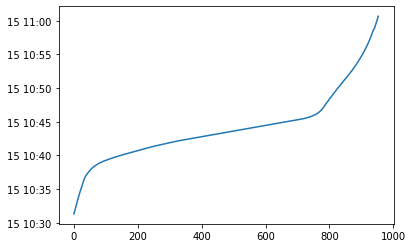

In [54]:
plt.plot(spec0.times.datetime)

It's probably a bit more clear if we plot the center of the time bin vs the size or integration time.

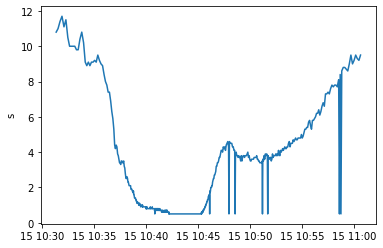

In [55]:
plt.plot(spec0.times.datetime, spec0.data['timedel'].to('s'))

## Compressed Pixel Data 
### Search & Download

Same procedure as before except we will use the `a.stix.DataProduct.sci_xray_cpd` attr to search for `CompressedPixelData`

In [56]:
cpd_query = Fido.search(a.Time('2021-12-15T10:30', '2021-12-15T11:01:00'), 
                         a.Instrument.stix, a.stix.DataProduct.sci_xray_cpd)
cpd_query['stix']

        Use sunpy.net.Scraper instead. [stixpy.net.client]


Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2021-12-15 10:02:59.000,2021-12-15 10:31:35.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150044
2021-12-15 10:30:27.000,2021-12-15 11:32:08.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150051
2021-12-15 10:35:15.000,2021-12-15 10:48:12.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150049
2021-12-15 10:35:34.000,2021-12-15 10:47:15.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150054
2021-12-15 10:41:12.000,2021-12-15 10:47:15.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150057


In [57]:
cpd_query['stix'][2:-1]

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2021-12-15 10:35:15.000,2021-12-15 10:48:12.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150049
2021-12-15 10:35:34.000,2021-12-15 10:47:15.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150054


In [58]:
cpd_files = Fido.fetch(cpd_query['stix'][2:-1])
[c.split('/')[-1] for c in cpd_files]

['solo_L1_stix-sci-xray-cpd_20211215T103534-20211215T104715_V01_2112150054-54922.fits',
 'solo_L1_stix-sci-xray-cpd_20211215T103515-20211215T104812_V01_2112150049-54909.fits']

Now lets load these files into `sitxpy`

In [59]:
cpd0 = ScienceData.from_fits(cpd_files[0])
cpd1 = ScienceData.from_fits(cpd_files[1])

cpd0, cpd1

(CompressedPixelData   <sunpy.time.timerange.TimeRange object at 0x123054e80>
     Start: 2021-12-15 10:35:34
     End:   2021-12-15 10:47:15
     Center:2021-12-15 10:41:24
     Duration:0.008119212962962974 days or
            0.19486111111111137 hours or
            11.691666666666682 minutes or
            701.5000000000009 seconds
     DetectorMasks
     [0...449]: [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
 
     PixelMasks
     [0...449]: [['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]
 
     EnergyMasks
     [0]: [_,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,_,_,_,_,_,_,_,_,_,_,_,_,_,_],
 CompressedPixelData   <sunpy.time.timerange.TimeRange object at 0x123054e80>
     Start: 2021-12-15 10:35:15
     End:   2021-12-15 10:48:12
     Center:2021-12-15 10:41:43
     Duration:0.008994212962962989 days or
            0.21586111111111173 hours or
            12.951666666666704 minutes or
            777.1000000000022 seconds
     Detect

In [60]:
cpd1.control['request_id'], cpd0.control['request_id']

(<Column name='request_id' dtype='uint32' length=1>
 2112150049,
 <Column name='request_id' dtype='uint32' length=1>
 2112150054)

In this case we can see the two requests are in fact quite different:
   * Req 2112150049 contains only one detector, more energies, and more times while
   * Req 2112150054 contains all detectors, fewer energies and fewer times
 

In [61]:
[(c.data['timedel'].to('s').min(), c.data['timedel'].to('s').max()) for c in [cpd0, cpd1]]

[(<Quantity 0.9 s>, <Quantity 9. s>), (<Quantity 0.5 s>, <Quantity 9.5 s>)]

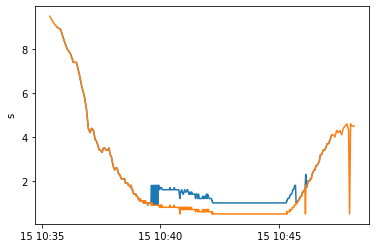

In [62]:
plt.plot(cpd0.data['time'].datetime, cpd0.data['timedel'].to('s'))
plt.plot(cpd1.data['time'].datetime, cpd1.data['timedel'].to('s'))

### Plotting
Let's have a look at the spectrogram plots

<AxesSubplot:ylabel='$\\mathrm{keV}$'>

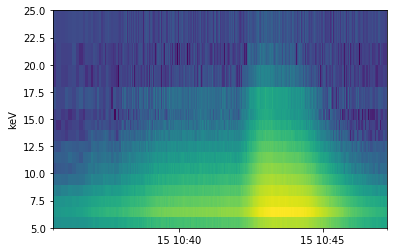

In [63]:
cpd0.plot_spectrogram()

<AxesSubplot:ylabel='$\\mathrm{keV}$'>

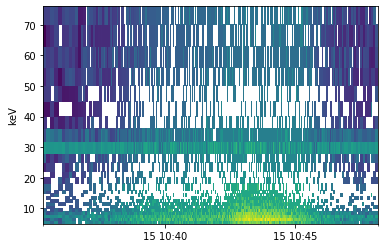

In [64]:
cpd1.plot_spectrogram()

The `cpd0` spectrogram is noisier due to the fact it only contains one detector.
`CompressedPixelData` support the same methods as `Spectrogram` so we can plot lightcurves of timeseries and spectrogram but it additionally has `plot_pixels()` methods.

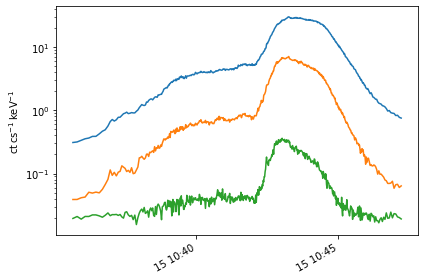

In [65]:
cpd0.plot_timeseries(energy_indices=[[1, 5,],[5, 10],[10,16]])

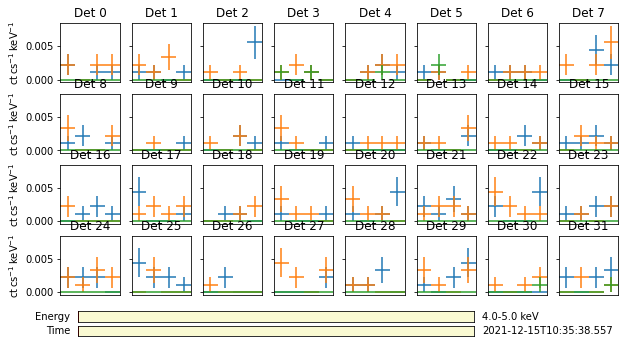

In [66]:
cpd0.plot_pixels()